In [1]:
# Importing required packages 

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



df = pd.read_csv(r"C:\Users\nabil\Downloads\movies.csv")

In [2]:
# Intially reviewing the data
df.head() # Seeing first 5 data rows

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# Looking for missing data

for col in df.columns:   # Iterating through each column that has null values 
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [4]:
# Data Types for the columns

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [6]:

# Convert the 'budget' and 'gross' columns to int64
df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0).astype(int)
df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(0).astype(int) 

In [57]:
# Extracting the correct year from released column

df['yearcorrect'] = df['released'].astype(str).str.split().str[2]

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7652,The Eight Hundred,Not Rated,Action,2020,"August 28, 2020 (United States)",6.8,3700.0,Hu Guan,Hu Guan,Zhi-zhong Huang,China,80000000,461421559,Beijing Diqi Yinxiang Entertainment,149.0,2020
7653,The Quarry,R,Crime,2020,"April 17, 2020 (Mexico)",5.4,2400.0,Scott Teems,Scott Teems,Shea Whigham,United States,0,3661,Prowess Pictures,98.0,2020
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.0,294.0,Scott Pryor,Scott Pryor,Scott Pryor,United States,0,413378,Pryor Entertainment,120.0,2020
7658,Black Wall Street Burning,R,Drama,2020,"February 7, 2020 (United States)",6.6,35.0,Marcus Brown,Dekoven Riggins,Dan Belcher,United States,5000,0,Notis Studio,78.0,2020


In [8]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,2019
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0,2015
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Loving Annabelle,Not Rated,Drama,2006,"May 24, 2007 (Germany)",6.3,12000.0,Katherine Brooks,Katherine Brooks,Erin Kelly,United States,1000000,0,Big Easy Pictures,77.0,2007
7667,Tee em el,NaN,Horror,2020,"August 19, 2020 (United States)",5.7,7.0,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,0,0,PK 65 Films,102.0,2020
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,-2147483648,Twentieth Century Fox,194.0,1997
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,-2147483648,Marvel Studios,181.0,2019


In [9]:
# Checking for duplicates
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90.0,2020
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0,2020
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,NaN,2020
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120.0,2020


In [30]:
df = df.dropna()


In [31]:
# Filter rows where both 'budget' and 'gross' are greater than or equal to zero
df = df[(df['budget'] >= 0) & (df['gross'] >= 0)]

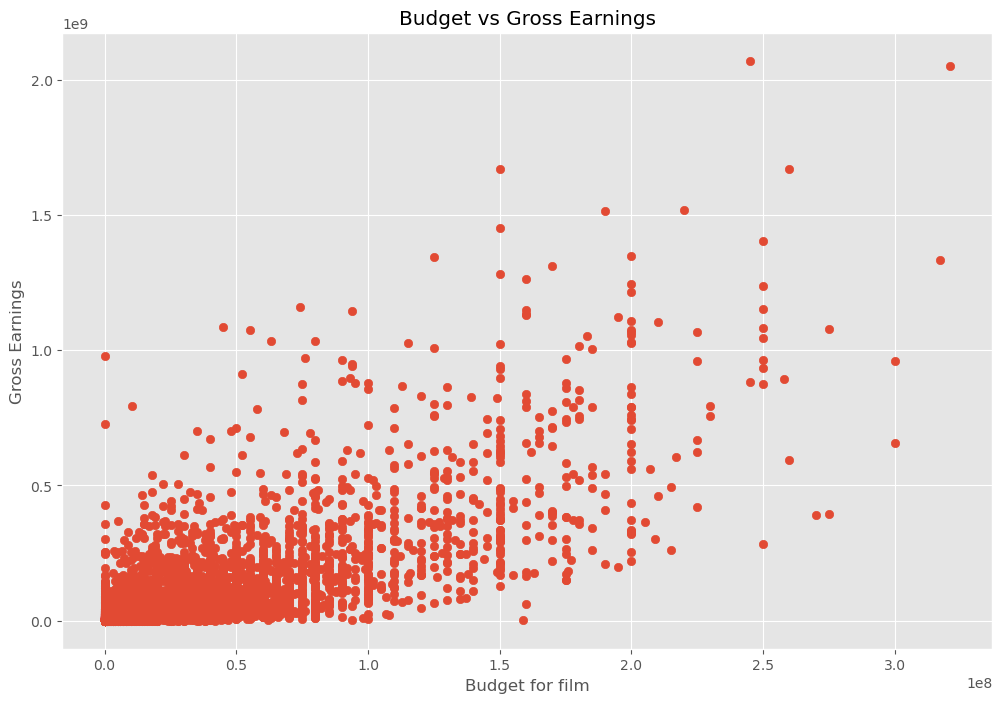

In [33]:
# Scatter Plot for Budget vs Gross
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for film')
plt.ylabel('Gross Earnings')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

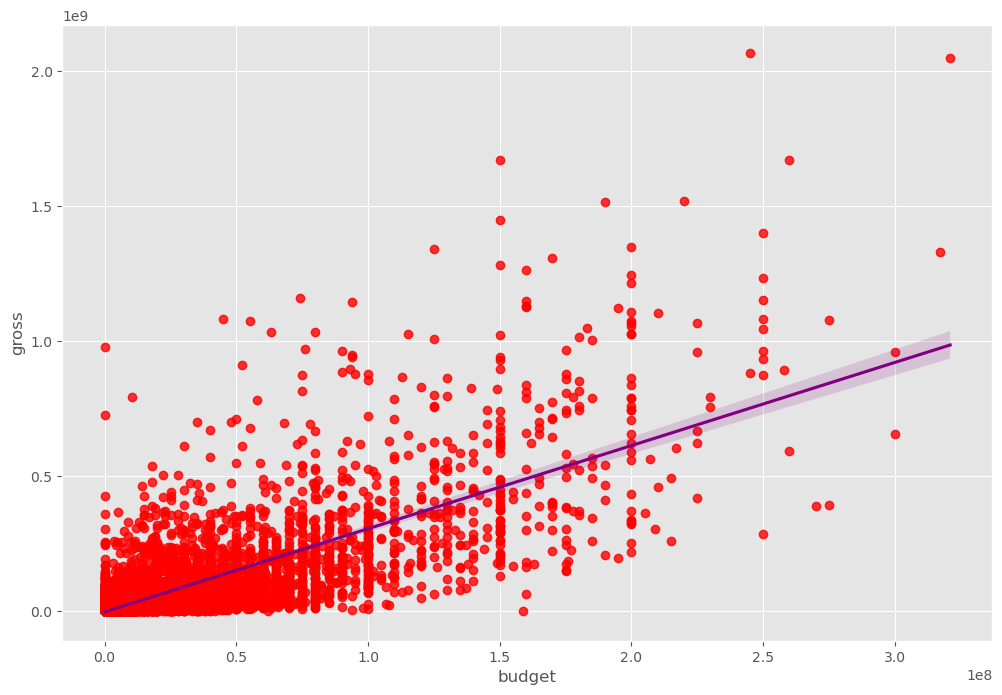

In [34]:
# Plot budget vs gross using seaborn 

sns.regplot(x="budget", y="gross", data=df, scatter_kws={"color": "red"}, line_kws={"color": "purple"})

In [35]:
df.corr(method='pearson') #pearson, kendall, spearman (different type of corr)

,year,score,votes,budget,gross,runtime
year,1.000000,0.102390,0.226767,0.315053,0.273088,0.120145
score,0.102390,1.000000,0.411612,0.053361,0.187581,0.399830
votes,0.226767,0.411612,1.000000,0.478590,0.632845,0.303520
budget,0.315053,0.053361,0.478590,1.000000,0.754866,0.263606
gross,0.273088,0.187581,0.632845,0.754866,1.000000,0.233902
runtime,0.120145,0.399830,0.303520,0.263606,0.233902,1.000000


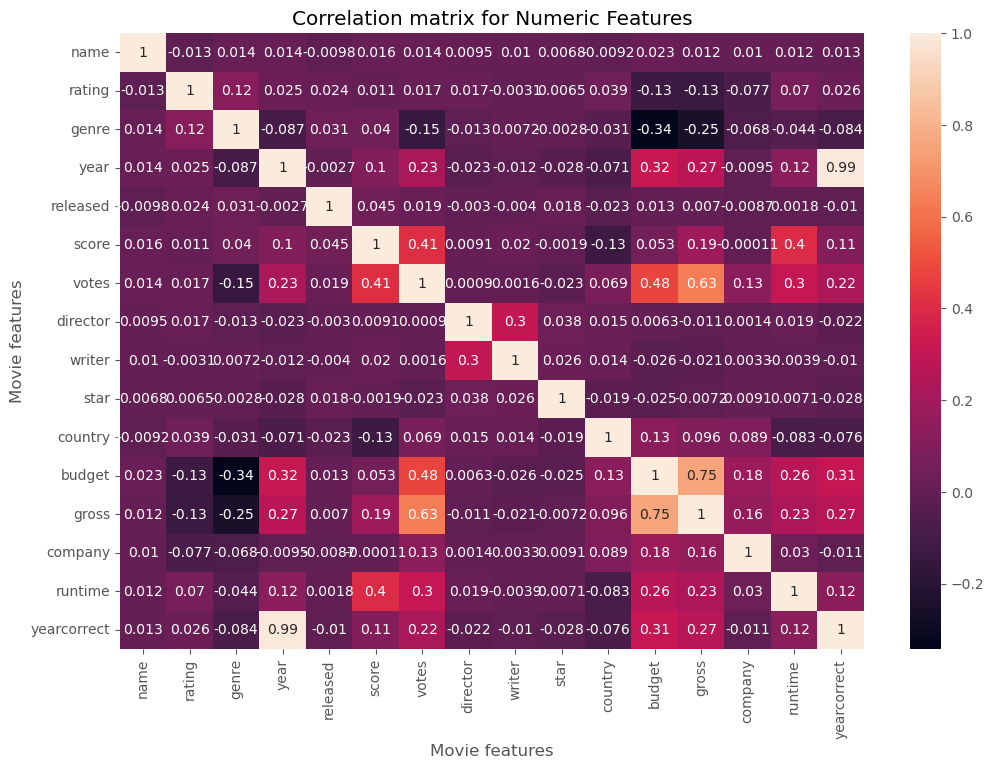

In [49]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [48]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.012595,0.014363,0.014197,-0.009777,0.016094,0.014428,0.009482,0.010285,0.006772,-0.009239,0.023133,0.011590,0.010154,0.011851,0.013305
rating,-0.012595,1.000000,0.117748,0.024651,0.024342,0.011420,0.016614,0.016928,-0.003139,0.006531,0.038543,-0.127563,-0.134623,-0.076894,0.070468,0.026028
genre,0.014363,0.117748,1.000000,-0.087250,0.031181,0.040143,-0.148000,-0.013439,0.007181,-0.002757,-0.030913,-0.342833,-0.248558,-0.068406,-0.044022,-0.084313
year,0.014197,0.024651,-0.087250,1.000000,-0.002698,0.102390,0.226767,-0.022886,-0.011868,-0.028317,-0.070852,0.315053,0.273088,-0.009531,0.120145,0.991920
released,-0.009777,0.024342,0.031181,-0.002698,1.000000,0.044918,0.019192,-0.003016,-0.004019,0.017693,-0.022891,0.012642,0.007042,-0.008685,0.001767,-0.010214
score,0.016094,0.011420,0.040143,0.102390,0.044918,1.000000,0.411612,0.009093,0.019770,-0.001877,-0.129764,0.053361,0.187581,-0.000107,0.399830,0.107522
votes,0.014428,0.016614,-0.148000,0.226767,0.019192,0.411612,1.000000,0.000899,0.001580,-0.023163,0.068829,0.478590,0.632845,0.128320,0.303520,0.222514
director,0.009482,0.016928,-0.013439,-0.022886,-0.003016,0.009093,0.000899,1.000000,0.297456,0.037530,0.014901,0.006319,-0.010610,0.001363,0.018676,-0.021582
writer,0.010285,-0.003139,0.007181,-0.011868,-0.004019,0.019770,0.001580,0.297456,1.000000,0.026478,0.014383,-0.025574,-0.020753,0.003303,-0.003945,-0.010229
star,0.006772,0.006531,-0.002757,-0.028317,0.017693,-0.001877,-0.023163,0.037530,0.026478,1.000000,-0.018873,-0.024612,-0.007192,0.009118,0.007145,-0.027522


In [54]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

name         name           1.000000
             rating         0.148871
             genre          0.036250
             year           0.965067
             released       0.959521
                              ...   
yearcorrect  budget         0.287087
             gross          0.840437
             company        0.491710
             runtime        0.046513
             yearcorrect    1.000000
Length: 256, dtype: float64


In [55]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

genre        rating        -0.088418
rating       genre         -0.088418
company      budget        -0.086475
budget       company       -0.086475
country      budget        -0.067450
                              ...   
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
Length: 256, dtype: float64


In [56]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

star         company        0.523516
company      star           0.523516
writer       company        0.544291
company      writer         0.544291
             director       0.547934
                              ...   
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
Length: 86, dtype: float64


In [53]:

df_numerized = df.copy()

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,6501,6,6,1980,1681,8.4,927000.0,2541,3957,1019,54,19000000,46998772,2269,146.0,2
1,5493,6,1,1980,1468,5.8,65000.0,2230,1611,314,55,4500000,58853106,709,104.0,2
2,5070,4,0,1980,1747,8.7,1200000.0,1091,2533,1705,55,18000000,538375067,1502,124.0,2
3,282,4,4,1980,1468,7.7,221000.0,1276,1974,2194,55,3500000,83453539,1765,88.0,2
4,1014,6,4,1980,1519,7.3,108000.0,1035,511,396,55,6000000,39846344,1732,98.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7652,5708,3,0,2020,486,6.8,3700.0,1074,1651,2744,8,80000000,461421559,360,149.0,42
7653,6394,6,5,2020,87,5.4,2400.0,2472,3826,2382,55,0,3661,1856,98.0,42
7656,6929,5,4,2020,1861,5.0,294.0,2467,3819,2323,55,0,413378,1858,120.0,42
7658,787,6,6,2020,1087,6.6,35.0,1736,1051,512,55,5000,0,1705,78.0,42
